<a href="https://colab.research.google.com/github/dmnk1308/DubAir/blob/main/Data_Set_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Data Set Introduction

This simple introduction to the Airbnb data set(s) will give you a short overview over the available data. The city used for this introduction is Berlin, hence if you want to run the exact same notebook for a different city you would need to change a few minor details. Otherwise, if you have downloaded all necessary data sets and run this notebook in the same directory it should run smoothly.

### Index
1. Load data set
2. Price analysis
    * (Inspect reviews)
3. Main file (listings.csv.gz)
4. "Analyze" Images
5. "Analyze" Reviews
6. Calendar file
7.  neighbourhoods Geo.json file

In [1]:
import os
import pandas as pd
import numpy as np
import gzip
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import matplotlib.image as mpimg


import seaborn as sns

np.set_printoptions(threshold=sys.maxsize)
from load_data import *

# 1. Load the Data

All availabe data sets are listed on: http://insideairbnb.com/get-the-data.html

For all cities there are 7 files:\
listings.csv \
reviews.csv \
listings.csv.gz \
reviews.csv.gz \
 \
calendar.csv.gz \
neighbourhoods.geojson \
neighbourhoods.csv 

In [2]:
url_listing = "http://data.insideairbnb.com/ireland/leinster/dublin/2021-11-07/data/listings.csv.gz"
url_reviews = "http://data.insideairbnb.com/ireland/leinster/dublin/2021-11-07/data/reviews.csv.gz"
listings = pd.read_csv(url_listing)
reviews = pd.read_csv(url_reviews)

In [3]:
print(list(listings.columns))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
print(np.unique(listings["bathrooms_text"].astype(str)))

['0 baths' '0 shared baths' '1 bath' '1 private bath' '1 shared bath'
 '1.5 baths' '1.5 shared baths' '2 baths' '2 shared baths' '2.5 baths'
 '2.5 shared baths' '3 baths' '3 shared baths' '3.5 baths'
 '3.5 shared baths' '4 baths' '4 shared baths' '4.5 baths' '5 baths'
 '5.5 baths' '6 baths' '6 shared baths' '6.5 baths' '7.5 baths'
 '8.5 baths' '9 baths' 'Half-bath' 'Private half-bath' 'Shared half-bath'
 'nan']


In [6]:
print(["id", "name", "last_scraped", "description", "neighborhood_overview", "host_id", "host_url", "host_name", "host_since", "host_location",
                                "host_about", "host_is_superhost", "host_listings_count", "host_has_profile_picture","host_identity_verified",
                                "neighbourhood_cleansed",
                                "latitude",
                                "longitude",
                                "property_type",
                                "room_type",
                                "accommodates",
                                "bathrooms_text",
                                "bedrooms",
                                "beds",
                                "amenities",
                                "minimum_nights",
                                "maximum_nights",
                                "has_availability",
                                "availability_30",
                                "availability_60",
                                "availability_90",
                                "availability_365",
                                "number_of_reviews",
                                "number_of_reviews_ltm", 
                                "number_of_reviews_l30d", 
                                "first_review",
                                "last_review",
                                "review_scores_rating",	 
                                "review_scores_accuracy",	
                                "review_scores_cleanliness",
                                "review_scores_checkin	",
                                "review_scores_communication",
                                "review_scores_location",	
                                "review_scores_value",
                                "instant_bookable",
                                "calculated_host_listings_count",
                                "reviews_per_month",
                                "host_has_profile_pic",
                                'minimum_minimum_nights', 
                                'maximum_minimum_nights', 
                                'minimum_maximum_nights', 
                                'maximum_maximum_nights', 
                                'minimum_nights_avg_ntm', 
                                'maximum_nights_avg_ntm',
                                'calculated_host_listings_count_entire_homes', 
                                'calculated_host_listings_count_private_rooms', 
                                'calculated_host_listings_count_shared_rooms', "price"] )

['id', 'name', 'last_scraped', 'description', 'neighborhood_overview', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_is_superhost', 'host_listings_count', 'host_has_profile_picture', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'minimum_nights', 'maximum_nights', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin\t', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month', 'host_has_profile_pic', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'ma

In [7]:
# text
l1 = list(pd.read_csv("text_data/host_name.csv").columns)
l2 = list(pd.read_csv("text_data/host_sent.csv").columns)
d = pd.read_csv("text_data/listings_reviews.csv")
l3 = list(d.drop(d.columns[0], axis = 1).columns)

l = l1 + l2 + l3
l.remove("Unnamed: 0")
l.remove("id")
l.remove("Unnamed: 0")
l.remove("id")

print(l)

['host_name_sounds_trad_irish', 'host_name_sounds_arab', 'host_name_sounds_africa', 'host_name_sounds_asia', 'host_name_sounds_eastern_europe', 'host_name_sounds_latin_america', 'host_name_sounds_west', 'host_name_sounds_rare', 'english_writing_host', 'compound_descr', 'negativity_descr', 'neutrality_descr', 'positivity_descr', 'compound_neigh_over', 'negativity_neigh_over', 'neutrality_neigh_over', 'positivity_neigh_over', 'compound_host_ab', 'negativity_host_ab', 'neutrality_host_ab', 'positivity_host_ab', 'prop_of_eng_reviews', 'mean_compound', 'mean_negativity', 'mean_neutrality', 'mean_positivity', 'mean_review_length', 'prop_of_neg_comp', 'most_neg_compound', 'most_pos_compound']


In [8]:
# images
l = list(pd.read_csv("/Users/dmnk/OneDrive - stud.uni-goettingen.de/Dokumente/3. Semester/SeminarDL/DubAir/data/img_info.csv").columns)
l.remove("id")
print(l)

['index', 'count', 'brightness', 'contrast', 'no_img_bathroom', 'no_img_bedroom', 'no_img_dining', 'no_img_hallway', 'no_img_kitchen', 'no_img_living', 'no_img_others']


In [9]:
# images
l = list(pd.read_csv("StreetData.csv").columns)
l.remove("id")
l.remove("Unnamed: 0")

print(l)

['in_city', 'bars', 'cafes', 'fast_foods', 'restaurants', 'library', 'university', 'bus_train_tram_station', 'bicycle_rentals', 'parking', 'taxi', 'casinos', 'cinemas', 'nightclubs', 'social_amenities', 'sex_amenities', 'theatres_artscentre', 'malls', 'kiosks', 'supermarkets', 'nearest_sight', '2nd_nearest_sight', '3rd_nearest_sight', 'mean_dist_sight', 'nearest_travel_poss', 'mean_dist_travel']


In [10]:
listings

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20211107161700,2021-11-08,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",NaN,NaN,25%,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,NaN,53.291780,-6.257920,Private room in bungalow,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Shower gel"", ""Hangers"", ""Cleaning products"",...",$65.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,0,0,22,202,2021-11-08,227,0,0,2011-08-18,2020-02-08,4.77,4.82,4.72,4.92,4.92,4.66,4.82,NaN,f,3,0,3,0,1.82
1,85148,https://www.airbnb.com/rooms/85148,20211107161700,2021-11-08,Habitación en Dublín Double room,<b>The space</b><br />I'm renting a double roo...,NaN,https://a0.muscache.com/pictures/583752/61c664...,466111,https://www.airbnb.com/users/show/466111,Don,2011-03-27,"Dublin, Ireland",I am single and live alone here so when I'm ...,within a day,50%,0%,f,https://a0.muscache.com/im/users/466111/profil...,https://a0.muscache.com/im/users/466111/profil...,Templeogue,1.0,1.0,"['email', 'phone', 'reviews']",t,f,NaN,South Dublin,NaN,53.298850,-6.318500,Private room in residential home,Private room,2,NaN,NaN,1.0,1.0,"[""Hangers"", ""Free parking on premises"", ""Dedic...",$30.00,1,5,1,1,5,5,1.0,5.0,NaN,t,0,0,0,68,2021-11-08,1,0,0,2019-05-11,2019-05-11,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,0.03
2,85156,https://www.airbnb.com/rooms/85156,20211107161700,2021-11-08,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",NaN,NaN,25%,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,NaN,53.292090,-6.256240,Private room in bungalow,Private room,2,NaN,1.5 shared baths,1.0,1.0,"[""Hangers"", ""Patio or balcony"", ""Hot water"", ""...",$63.00,3,21,3,3,21,21,3.0,21.0,NaN,t,0,0,21,296,2021-11-08,182,0,0,2014-11-24,2020-02-09,4.79,4.85,4.72,4.88,4.88,4.66,4.80,NaN,f,3,0,3,0,2.15
3,159889,https://www.airbnb.com/

In [11]:
price = listings["price"]
price = price.str.replace("$","")
price = price.str.replace(",","")
price = price.astype(float)
price = pd.DataFrame(price)
filter = (price < 500).values
listings = listings[filter]
price = price[filter]
price["log_price"] = np.log(price)
price["id"] = listings["id"]
price = price[["id", "price", "log_price"]]


In [12]:
(price["price"]>500).sum()

0

In [13]:
price["price"].argmax()
price = price.drop([5294], axis = 0)

KeyError: '[5294] not found in axis'

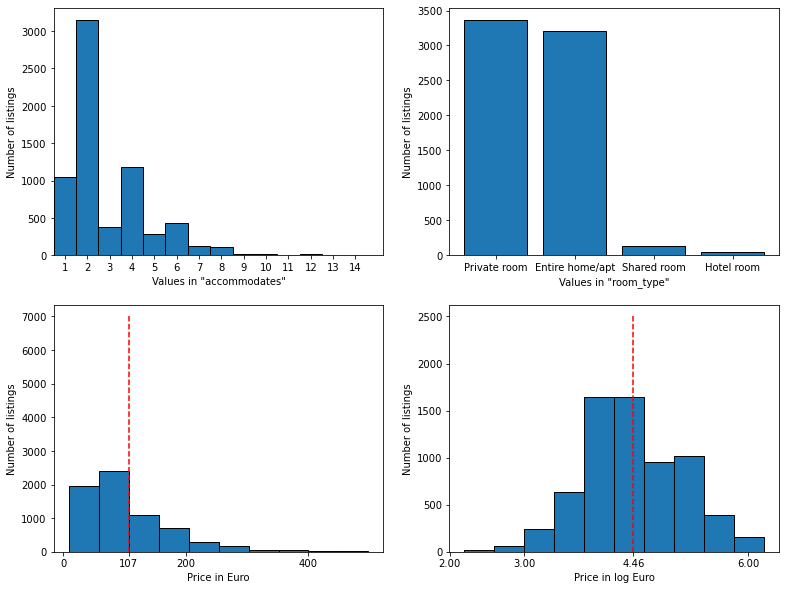

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (13,10))

ax1.hist(listings["accommodates"], bins = range(0,16), align = "left",edgecolor='black')
ax1.set_xticks(range(15))
ax1.set_xlabel("Values in \"accommodates\"")
ax1.set_xlim(0.5)
ax1.set_ylabel("Number of listings")


ax2.bar(listings["room_type"].value_counts().index.values, listings["room_type"].value_counts(), edgecolor='black')
ax2.set_xlabel("Values in \"room_type\"")
ax2.set_ylabel("Number of listings")

ax3.hist(price["price"],edgecolor='black')
ax3.set_xlabel("Price in Euro")
ax3.set_ylabel("Number of listings")
ticks = np.insert(np.arange(0.,12000.,200.),0,np.round(price["price"].mean(),2))
ax3.set_xticks(ticks)
ax3.vlines(price["price"].mean(), 0, 7000, colors = "red", linestyles = "dashed")

ax4.hist(price["log_price"],edgecolor='black')
ax4.set_xlabel("Price in log Euro")
ax4.set_ylabel("Number of listings")
ticks = np.insert(np.arange(0.,4.),0,np.round(price["log_price"].mean(),2))
ticks = np.insert(ticks, 0, np.arange(6,10))
ax4.set_xticks(ticks)
ax4.vlines(price["log_price"].mean(), 0, 2500, colors = "red", linestyles = "dashed")

plt.savefig("plots/descriptive1.png")

plt.show()

In [9]:
listings["room_type"].value_counts()

Private room       3436
Entire home/apt    3348
Shared room         138
Hotel room           54
Name: room_type, dtype: int64

In [10]:
na_df = pd.DataFrame(listings.isna().sum()[listings.isna().sum()!=0])
na_df.columns = ["NAs"]
na_df.index = na_df.index.rename("Variable")
na_df = na_df.sort_values("NAs", ascending = False)
print(na_df.to_latex())

\begin{tabular}{lr}
\toprule
{} &   NAs \\
Variable                     &       \\
\midrule
neighbourhood\_group\_cleansed &  6976 \\
calendar\_updated             &  6976 \\
license                      &  6976 \\
bathrooms                    &  6976 \\
host\_response\_rate           &  4509 \\
host\_response\_time           &  4509 \\
host\_acceptance\_rate         &  4328 \\
host\_about                   &  3466 \\
neighbourhood                &  3028 \\
neighborhood\_overview        &  3028 \\
host\_neighbourhood           &  2173 \\
review\_scores\_value          &  1582 \\
review\_scores\_location       &  1580 \\
review\_scores\_checkin        &  1580 \\
review\_scores\_accuracy       &  1574 \\
review\_scores\_communication  &  1574 \\
review\_scores\_cleanliness    &  1573 \\
review\_scores\_rating         &  1429 \\
last\_review                  &  1429 \\
first\_review                 &  1429 \\
reviews\_per\_month            &  1429 \\
beds                         &   242 \

In [23]:
listings["property_type"].value_counts()

Entire rental unit                  1592
Private room in rental unit         1392
Private room in residential home    1347
Entire residential home              927
Entire condominium (condo)           269
                                    ... 
Houseboat                              1
Hut                                    1
Shared room in casa particular         1
Igloo                                  1
Entire vacation home                   1
Name: property_type, Length: 61, dtype: int64

In [22]:
np.unique(listings["property_type"])

array(['Boat', 'Camper/RV', 'Casa particular', 'Castle', 'Dome house',
       'Entire bungalow', 'Entire cabin', 'Entire chalet',
       'Entire condominium (condo)', 'Entire cottage',
       'Entire guest suite', 'Entire guesthouse', 'Entire loft',
       'Entire place', 'Entire rental unit', 'Entire residential home',
       'Entire serviced apartment', 'Entire townhouse',
       'Entire vacation home', 'Entire villa', 'Farm stay', 'Houseboat',
       'Hut', 'Igloo', 'Private room',
       'Private room in bed and breakfast', 'Private room in bungalow',
       'Private room in cabin', 'Private room in casa particular',
       'Private room in chalet', 'Private room in condominium (condo)',
       'Private room in cottage', 'Private room in floor',
       'Private room in guest suite', 'Private room in guesthouse',
       'Private room in hostel', 'Private room in loft',
       'Private room in rental unit', 'Private room in residential home',
       'Private room in serviced apartmen

In [3]:
 price_new, listings_new, _ = load_data()

------------------------------
Loading data...
------------------------------
Data loaded.
Data cleansed.
Imputation done. No NaN's are left in the data.
Further Modifications are done.
Text Data generated.
Have fun implementing your models.


In [5]:
listings_new["count"]

0       36.0
1       38.0
2       13.0
3       23.0
4       40.0
        ... 
6835     0.0
6836     6.0
6837     0.0
6838     0.0
6839     0.0
Name: count, Length: 6840, dtype: float64

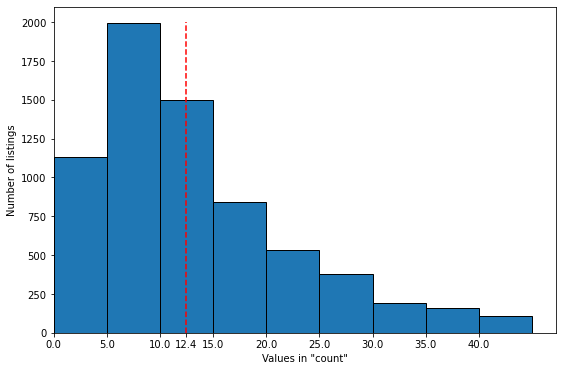

In [26]:
fig, ax1 = plt.subplots( figsize = (9,6))

ax1.hist(listings_new["count"],edgecolor='black', bins = range(0,50,5))
ax1.set_xlabel("Values in \"count\"")
ax1.set_xlim(0)
ax1.set_ylabel("Number of listings")

ticks = np.insert(np.arange(0.,45.,5.),0,np.round(listings_new["count"].mean(),2))
#ticks = np.insert(ticks, 0, np.arange(6,10))
ax1.set_xticks(ticks)
ax1.vlines(listings_new["count"].mean(), 0, 2000, colors = "red", linestyles = "dashed")

plt.savefig("plots/no_imgs.png")

plt.show()

In [27]:
listings_new["count"].max()

47.0

# MODELS
## ROOM

In [48]:
train = pd.read_csv("logs/room/final/run-train-tag-epoch_loss.csv")
train.drop("Wall time", axis = 1, inplace = True)
val =  pd.read_csv("logs/room/final/run-validation-tag-epoch_loss.csv")
val.drop("Wall time", axis = 1, inplace = True)
train["Data"] = "Training"
val["Data"] = "Validation"
df = pd.concat((train, val))
df.reset_index(drop = True, inplace = True)

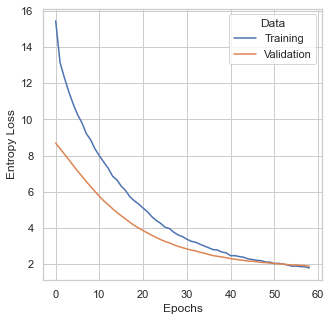

In [54]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x="Step", y="Value", hue="Data", ax = ax)
ax.set_xlabel("Epochs")
ax.set_ylabel("Entropy Loss")
plt.show()

In [2]:
X_train, X_test, X_val, y_train, y_test, y_val = load_data(drop_id = False, for_dendro=True, standardize = False)


------------------------------
Fit and Transform data...
------------------------------
58 amenities have been removed due to close zero-variance.
Text, OpenStreet and image data loaded.
44 binary variables have been removed due to close zero-variance.
Imputation done. No NaN's are left in the data.
Due to insignificant t-tests we drop:
['host_is_superhost', 'Extra pillows and blankets', 'Luggage dropoff allowed', 'Free_parking', 'host_name_sounds_west', 'host_name_sounds_rare', 'neighbourhood_cleansed_Dn Laoghaire-Rathdown']
------------------------------
Transform data...
------------------------------
58 amenities have been removed due to close zero-variance.
Text, OpenStreet and image data loaded.
44 binary variables have been removed due to close zero-variance.
Imputation done. No NaN's are left in the data.
Due to insignificant t-tests we drop:
['host_is_superhost', 'Extra pillows and blankets', 'Luggage dropoff allowed', 'Free_parking', 'host_name_sounds_west', 'host_name_sounds

In [26]:
X_train_new = X_train.loc[~np.any(X_train[["no_img_others","no_img_hallway", "no_img_dining", "no_img_bathroom", "no_img_bedroom", "no_img_kitchen", "no_img_living"]].values == 0, axis = 1),:]

In [27]:
(X_train_new[["no_img_others","no_img_hallway", "no_img_dining", "no_img_bathroom", "no_img_bedroom", "no_img_kitchen", "no_img_living"]]==0).sum()

no_img_others      1188
no_img_hallway     2759
no_img_dining      2689
no_img_bathroom     768
no_img_bedroom      233
no_img_kitchen      838
no_img_living       967
dtype: int64

In [6]:
for i in ["no_img_others", "no_img_hallway", "no_img_dining", "no_img_bathroom", "no_img_bedroom", "no_img_kitchen", "no_img_living"]:
    print(X_train[i].value_counts())

0.0     1740
1.0      763
2.0      598
3.0      409
4.0      258
5.0      209
6.0      196
7.0      114
8.0       87
9.0       80
10.0      58
12.0      45
11.0      42
13.0      30
15.0      29
14.0      24
16.0      14
18.0      14
19.0      11
17.0       9
22.0       7
20.0       6
21.0       3
33.0       3
24.0       3
23.0       3
27.0       3
26.0       3
32.0       2
25.0       2
29.0       2
37.0       1
30.0       1
62.0       1
43.0       1
38.0       1
36.0       1
35.0       1
39.0       1
41.0       1
Name: no_img_others, dtype: int64
0.0     3311
1.0      934
2.0      308
3.0      116
4.0       47
5.0       31
6.0       12
11.0       5
7.0        4
8.0        3
9.0        2
12.0       1
13.0       1
10.0       1
Name: no_img_hallway, dtype: int64
0.0     3241
1.0     1029
2.0      322
3.0      108
4.0       45
5.0       18
8.0        5
7.0        5
6.0        2
10.0       1
Name: no_img_dining, dtype: int64
1.0     1343
0.0     1320
2.0     1083
3.0      571
4.0      240


In [2]:
X_train, X_test, X_val, y_train, y_test, y_val = load_data(drop_id = True)


------------------------------
Fit and Transform data...
------------------------------
58 amenities have been removed due to close zero-variance.
Text, OpenStreet and image data loaded.
44 binary variables have been removed due to close zero-variance.
Imputation done. No NaN's are left in the data.
PCA's built and correlated features dropped.
Due to insignificant t-tests we drop:
['host_is_superhost', 'Extra pillows and blankets', 'Luggage dropoff allowed', 'Free_parking', 'host_name_sounds_west', 'host_name_sounds_rare', 'neighbourhood_cleansed_Dn Laoghaire-Rathdown']
------------------------------
Transform data...
------------------------------
58 amenities have been removed due to close zero-variance.
Text, OpenStreet and image data loaded.
44 binary variables have been removed due to close zero-variance.
Imputation done. No NaN's are left in the data.
PCA's built and correlated features dropped.
Due to insignificant t-tests we drop:
['host_is_superhost', 'Extra pillows and blanke

In [5]:
print(list(X_train.columns))

['host_identity_verified', 'instant_bookable', 'Breakfast', 'Carbon_monoxide_alarm', 'Elevator', 'Fire_extinguisher', 'Private_entrance', 'Workspace', 'Shampoo_Conditioner_available', 'Dryer_available', 'TV_available', 'kiosks', 'host_since', 'latitude', 'longitude', 'number_of_reviews', 'last_review', 'review_scores_communication', 'name_length', 'prop_of_eng_reviews', 'mean_review_length', 'negativity_descr', 'negativity_neigh_over', 'negativity_host_ab', 'parking', 'brightness', 'contrast', 'city_life_pca1', 'city_life_pca2', 'city_life_pca3', 'city_life_pca4', 'city_life_pca5', 'travel_touristic_pca', 'kitchen_pca1', 'kitchen_pca2', 'kitchen_pca3', 'kitchen_pca4', 'accommodation_size_pca1', 'accommodation_size_pca2', 'accommodation_size_pca3', 'accommodation_size_pca4', 'accommodation_size_pca5', 'accommodation_size_pca6', 'host_listings_pca1', 'host_listings_pca2', 'host_listings_pca3', 'min_nights_pca', 'availability_pca', 'review_total_pca1', 'review_total_pca2', 'review_total_p